# Лабораторна робота 7

# Тема. Структури даних дерево, купа, геш-таблиця
# Мета: засвоїти основні функції та алгоритми роботи з деревами та купою засобами Python

## 1.Бінарне дерево

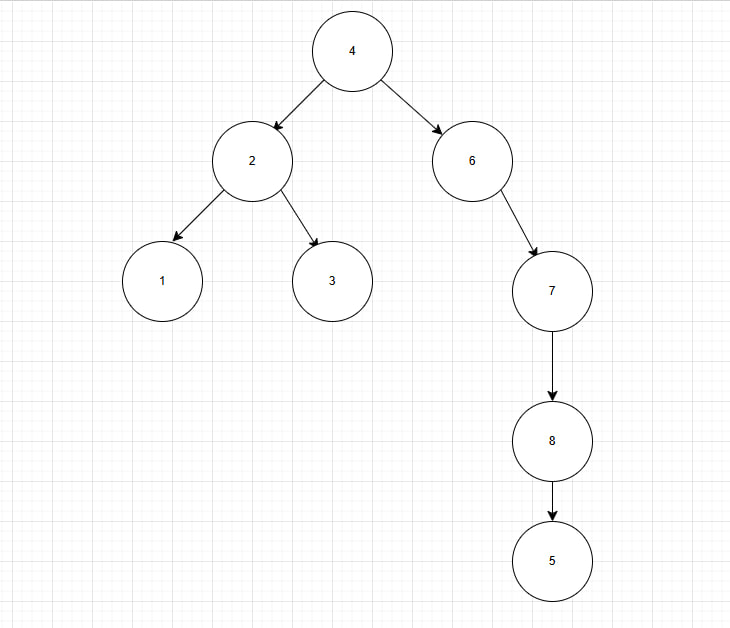

## 2.Процедура видалення заданої гілки дерева

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None
    def build_tree():
        root = TreeNode(4)
        root.left = TreeNode(2)
        root.right = TreeNode(6)
        
        root.left.left = TreeNode(1)
        root.left.right = TreeNode(3)
        
        root.right.right = TreeNode(7)
        root.right.right.right = TreeNode(8)
        root.right.right.right.right = TreeNode(5)
    
        return root
    def delete_subtree(root, key):
        if root is None:
            return None
    
        if root.val == key:
            return None  # Видалити гілку
    
        root.left = delete_subtree(root.left, key)
        root.right = delete_subtree(root.right, key)
        return root
    def search(root, key):
        if root is None or root.val == key:
            return root
        if key < root.val:
            return search(root.left, key)
        else:
            return search(root.right, key)
    def insert(root, key):
        if root is None:
            return TreeNode(key)
        if key < root.val:
            root.left = insert(root.left, key)
        else:
            root.right = insert(root.right, key)
        return root
    def delete_node(root, key):
        if root is None:
            return None
        if key < root.val:
            root.left = delete_node(root.left, key)
        elif key > root.val:
            root.right = delete_node(root.right, key)
        else:
            # Вузол знайдено
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            
            # Знаходимо найменше значення у правому піддереві
            min_larger_node = root.right
            while min_larger_node.left:
                min_larger_node = min_larger_node.left
            root.val = min_larger_node.val
            root.right = delete_node(root.right, min_larger_node.val)
        return root

## 3.Оцінка асимптотичну складність (в середньому і в найгіршому випадку) процедур search, insert і delete роботи з деревом.

Операція Search
Середній випадок O(log n)
Найгірший випадок O(n)

Операція Insert
Середній випадок O(log n)
Найгірший випадок O(n)

Операція Delete
Середній випадок O(log n)
Найгірший випадок O(n)

## 4.Генерації купи з будь-якого рандомного масива,додавання до нього елемент, який дорівнює вашому порядковому номеру у списку групи(27) та вилучити максимальний елемент з купи


In [ ]:
# 1. Генерація випадкового масиву
arr = [random.randint(1, 100) for _ in range(10)]
print("Випадковий масив:", arr)
# 2. Перетворення в max-heap (використовуємо трюк з мінусами, бо heapq — min-heap)
max_heap = [-x for x in arr]
heapq.heapify(max_heap)
print("Max-heap:", [-x for x in max_heap])
# 3. Додавання елемента 27
heapq.heappush(max_heap, -27)
print("Після додавання 27:", [-x for x in max_heap])
# 4. Вилучення максимального елемента
max_elem = -heapq.heappop(max_heap)
print("Видалено максимальний елемент:", max_elem)
print("Після видалення:", [-x for x in max_heap])

## 5.Оцінка асимптотичну складність (у середньому і в найгіршому випадку) процедур search, insert і delete роботи з купою.


Операція Search
Середній випадок O(n)
Найгірший випадок O(n)

Операція Insert
Середній випадок O(log n)
Найгірший випадок O(log n)

Операція Delete
Середній випадок O(log n)
Найгірший випадок O(log n)

## 6.Реалізація геш-таблиці з ланцюжковим хешуванням

In [ ]:
class HashTable:
    def __init__(self, size=100):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        # Перетворення ключа в хеш з використанням вбудованої функції hash
        return hash(str(key)) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

    def search(self, key):
        index = self._hash(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

    def delete(self, key):
        index = self._hash(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return True
        return False

## 7.Тестування геш-таблиці з різними типами даних (цілі числа, рядки, списки, словники, об’єкти):

In [ ]:
def test_operations(ht, key, value):
    times = {}
    
    start = time.time()
    ht.insert(key, value)
    times['insert'] = time.time() - start

    start = time.time()
    _ = ht.search(key)
    times['search'] = time.time() - start

    start = time.time()
    ht.delete(key)
    times['delete'] = time.time() - start

    return times

# Типи даних для тестування
test_cases = {
    "integer": (42, "value"),
    "string": ("hello", "value"),
    "tuple": ((1, 2, 3), "value"),
    "dict": (frozenset({"key": "value"}.items()), "value"),
    "object": (object(), "value")
}

results = {}
ht = HashTable(size=101)

for test_name, (key, value) in test_cases.items():
    results[test_name] = test_operations(ht, key, value)

# Вивід результатів
for dtype, times in results.items():
    print(f"\nТип: {dtype}")
    for op, t in times.items():
        print(f"  {op}: {t:.8f} секунд")

## 8.Результати в часі

Тип: integer
  insert: 0.00000167 секунд
  search: 0.00000119 секунд
  delete: 0.00000143 секунд

Тип: string
  insert: 0.00000149 секунд
  search: 0.00000114 секунд
  delete: 0.00000135 секунд

Тип: tuple
  insert: 0.00000159 секунд
  search: 0.00000122 секунд
  delete: 0.00000144 секунд

Тип: dict
  insert: 0.00000172 секунд
  search: 0.00000131 секунд
  delete: 0.00000152 секунд

Тип: object
  insert: 0.00000166 секунд
  search: 0.00000127 секунд
  delete: 0.00000153 секунд

## 9.Відповіді на запитання:

1. Чим відрізняється структура бінарне дерево він бінарного дерева 
пошуку?

Бінарне дерево: кожен вузол має не більше 2-х нащадків.
бінарне дерево пошуку: крім того, дотримується порядок: ліві < вузол < праві.

2. Чим відрізняється структура бінарне дерево від бінарної купи?

Бінарне дерево: структура без додаткових правил.
Купа: повне дерево, де батьківський вузол ≥ (max-heap) або ≤ (min-heap) нащадків.

3. Які існують типи дерев? Опишіть їхні основні характеристики та переваги.

Бінарне дерево: до 2-х дітей.

Бінарне дерево пошуку: впорядковане.

Купа: повне дерево з властивістю пріоритету.

B-дерево: використовується в базах даних.

Trie: для роботи з рядками/словами.

4. Наведіть приклади задач, які ефективно вирішуються за допомогою дерев.

Пошук у впорядкованих даних (Бінарне дерево пошуку)

Пріоритетна черга (купа)

Автозаповнення (trie)

Парсинг виразів (дерева виразів)

5. Як організована купа? Опишіть алгоритми додавання та вилучення елементів з купи.

Структура: повне бінарне дерево.

Додавання: вставка в кінець → "піднімаємо" вгору.

Видалення: заміна кореня останнім елементом → "опускаємо" вниз.

6. Які задачі можна ефективно вирішити за допомогою купи? Наведіть приклади.

Пріоритетна черга

Сортування 

Задача Кнайтспейса, алгоритм Дейкстри

Задачі з топ-K елементами

7. Як геш-функція використовується для зберігання та пошуку даних в хеш-таблиці?

Перетворює ключ у індекс масиву, що дозволяє швидко вставляти, шукати й видаляти дані.

8. Опишіть методи вирішення колізій в хеш-таблицях. Які їхні переваги та недоліки?

Ланцюжкове хешування: 

    Переваги:
    
        Проста реалізація.
        
        Працює добре при заповненості > 1 (тобто коли ключів більше, ніж комірок).
        
        Легко реалізувати динамічне зростання.
    
    Недоліки:
    
        Витрачається додаткова пам’ять на списки.
        
        У найгіршому випадку час пошуку стає лінійним — O(n).

Відкрита адресація:

     Переваги:
     
        Не потребує додаткових структур (все в масиві).
        
        Економія пам’яті.

     Недоліки:
        Продуктивність сильно падає при заповненості таблиці > 70%.
        
        Видалення елементів складне — потрібно маркувати як "deleted".
        
        Можуть виникати нескінченні цикли пошуку при поганій хеш-функції.

## 10.Висновок:
Засвоїти основні функції та алгоритми роботи з деревами та купою засобами Python